In [1]:
from sklearn.datasets import fetch_openml

## Load the data 

In [ ]:
import numpy as np

data = fetch_openml('mnist_784', version=1, as_frame=False)

images = np.asarray(data.data, dtype=np.float32)

images = images / 255.0

print("images shape:", images.shape)
print("min/max:", images.min(), images.max())

images shape: (70000, 784)
min/max: 0.0 1.0


## Add noise and train the model to reconstruct the clean image 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

rng = np.random.RandomState(42)
noise_std = 0.35  
noisy_images = images + rng.normal(loc=0.0, scale=noise_std, size=images.shape).astype(np.float32)

noisy_images = np.clip(noisy_images, 0, 1)

n_samples = 12000
X = noisy_images[:n_samples]
y = images[:n_samples]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = KNeighborsRegressor(n_neighbors=3, weights="distance", n_jobs=-1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Train/Test:", X_train.shape, X_test.shape)
print("Pred shape:", y_pred.shape)

Train/Test: (9600, 784) (2400, 784)
Pred shape: (2400, 784)


## Evaluate the model performance 

In [4]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)

MSE: 0.02309830855876063
MAE: 0.05531388261682293


## Plot and predict the clean image

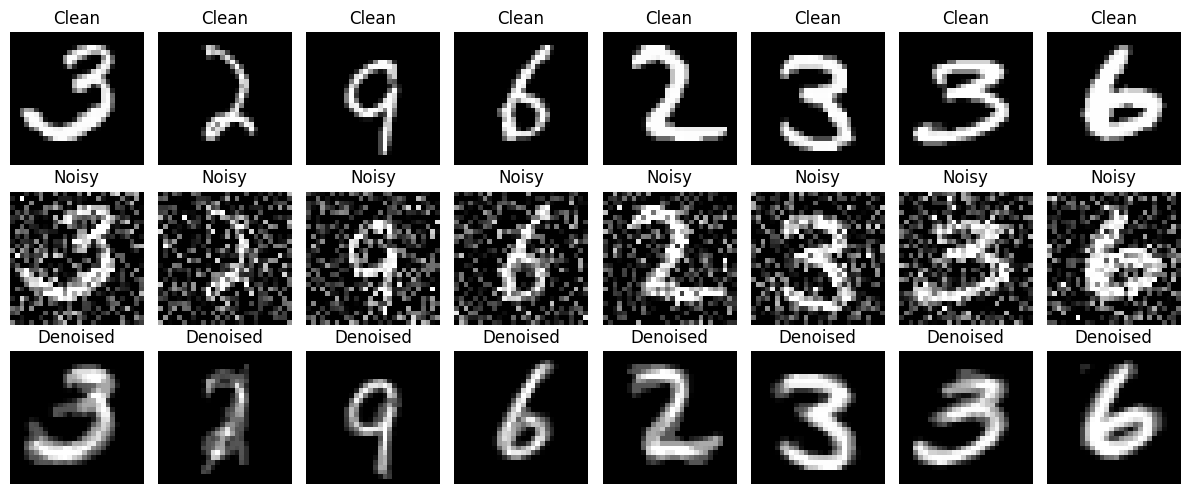

In [ ]:
import matplotlib.pyplot as plt

num_show = 8

plt.figure(figsize=(12, 5))

for i in range(num_show):
    plt.subplot(3, num_show, i + 1)
    plt.imshow(y_test[i].reshape(28, 28), cmap="gray")
    plt.title("Clean")
    plt.axis("off")

    plt.subplot(3, num_show, num_show + i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")
    plt.title("Noisy")
    plt.axis("off")

    plt.subplot(3, num_show, 2*num_show + i + 1)
    plt.imshow(y_pred[i].reshape(28, 28), cmap="gray")
    plt.title("Denoised")
    plt.axis("off")

plt.tight_layout()
plt.show()